In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import rowgenerators as rg
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [21]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [22]:
df = pkg.resource('homeless_survey').dataframe()

In [4]:
t1 = pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='count')

t1.loc[:,'All']


raceeth
aian         804
asian        749
black      31692
hisp       19543
nhopi        355
nhwhite    15009
other       3745
All        71897
Name: All, dtype: int64

In [5]:
t2 = pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='sum')
t2

sex,F,M,All
raceeth,,,
aian,109,163,272
asian,91,114,205
black,3125,5634,8759
hisp,1501,2369,3870
nhopi,39,57,96
nhwhite,1625,3140,4765
other,391,660,1051
All,6881,12137,19018


In [6]:
t2/t1

sex,F,M,All
raceeth,,,
aian,0.386525,0.312261,0.338308
asian,0.366935,0.227545,0.273698
black,0.301845,0.264024,0.276379
hisp,0.241902,0.177613,0.198025
nhopi,0.330508,0.240506,0.270423
nhwhite,0.368899,0.296115,0.317476
other,0.334474,0.256211,0.280641
All,0.302063,0.247104,0.264517


In [7]:
pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='mean')

sex,F,M,All
raceeth,,,
aian,0.386525,0.312261,0.338308
asian,0.366935,0.227545,0.273698
black,0.301845,0.264024,0.276379
hisp,0.241902,0.177613,0.198025
nhopi,0.330508,0.240506,0.270423
nhwhite,0.368899,0.296115,0.317476
other,0.334474,0.256211,0.280641
All,0.302063,0.247104,0.264517


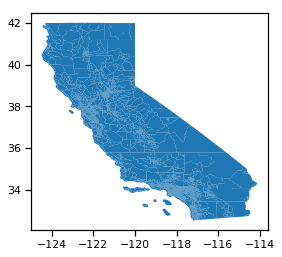

In [8]:
tracts = rg.geoframe('census://CA/140')
tracts.plot()

In [9]:
tj = tracts.merge(df, on='geoid')
tj.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,...,physical_disability,mental_illness,alcohol_abuse,drug_abuse,drug_alcohol_history,hiv_positive,part_time,full_time,unemployed_looking,unemployed_not_looking
0,06,037,204920,14000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,0,1,0.0,0.0,1,0,0.0,0.0,0.0,0.0
1,06,037,204920,14000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
2,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
3,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,...,0,1,0.0,0.0,0,0,0.0,0.0,0.0,1.0
4,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,...,1,1,0.0,1.0,1,0,0.0,0.0,0.0,1.0


In [10]:
len(tj)

40513

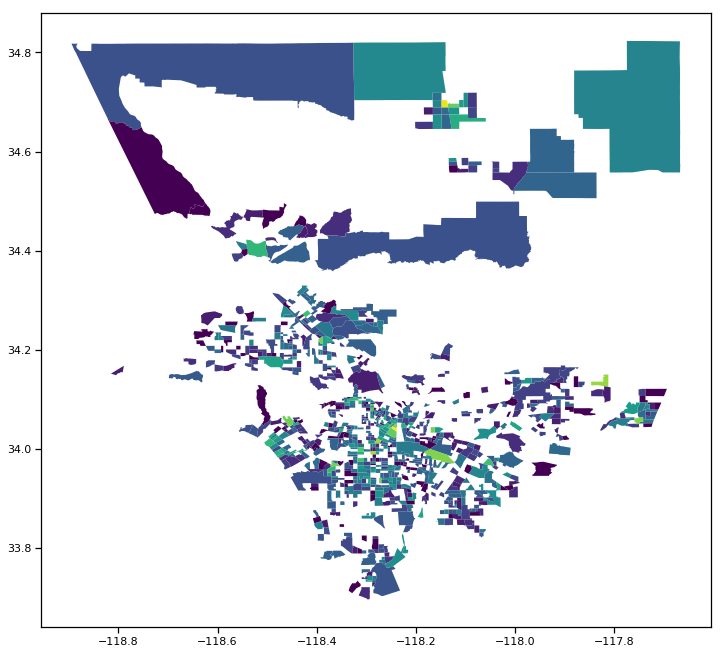

In [11]:
df['n'] = 1
t = df.groupby('geoid').sum()
t['mi_rate'] = t.mental_illness / t['n']
t2 = tracts.set_index('geoid').join(t[['mi_rate', 'n']], how='right')
t2['z'] = np.log(t2['n']/t2['n'].std())
t2.plot(column='z', figsize=(12,12))


In [12]:
t2.z.describe()

count    942.000000
mean      -3.124980
std        1.539776
min       -5.338555
25%       -4.239943
50%       -3.259114
75%       -2.119680
max        3.022685
Name: z, dtype: float64

In [13]:
t2.to_csv('lacount.csv')

In [18]:
t2

,statefp,countyfp,tractce,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry,mi_rate,n,z
geoid,,,,,,,,,,,,,,,
14000US06037101110,06,037,101110,1011.10,Census Tract 1011.10,G5020,S,1142402.0,0.0,+34.2594737,-118.2929869,"POLYGON ((-118.302291 34.258697, -118.300912 3...",0.500000,2,-4.645408
14000US06037101210,06,037,101210,1012.10,Census Tract 1012.10,G5020,S,650690.0,0.0,+34.2529724,-118.2907309,"POLYGON ((-118.299451 34.255978, -118.297919 3...",0.666667,12,-2.853649
14000US06037101220,06,037,101220,1012.20,Census Tract 1012.20,G5020,S,698886.0,0.0,+34.2516083,-118.2816328,"POLYGON ((-118.285925 34.252274, -118.285924 3...",0.500000,18,-2.448184
14000US06037101300,06,037,101300,1013,Census Tract 1013,G5020,S,2581214.0,0.0,+34.2487734,-118.2709978,"POLYGON ((-118.278224 34.250679, -118.278224 3...",0.222222,36,-1.755036
14000US06037101400,06,037,101400,1014,Census Tract 1014,G5020,S,6310056.0,0.0,+34.2428521,-118.2941612,"POLYGON ((-118.322382 34.249631, -118.322116 3...",0.125000,16,-2.565967
14000US06037102103,06,037,102103,1021.03,Census Tract 1021.03,G5020,S,1186484.0,0.0,+34.2250792,-118.3541880,"POLYGON ((-118.365326 34.228703, -118.363961 3...",0.466667,15,-2.630505
14000US06037102105,06,037,102105,1021.05,Census Tract 1021.05,G5020,S,492761.0,0.0,+34.2098760,-118.3492653,"POLYGON ((-118.35307 34.20878, -118.353066 34....",0.166667,6,-3.546796
14000US06037102107,06,037,102107,1021.07,Census Tract 1021.07,G5020,S,12908567.0,13753.0,+34.2409052,-118.3396019,"POLYGON ((-118.367885 34.239393, -118.367879 3...",0.125000,8,-3.259114
14000US06037103100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,-5.338555


In [23]:
df

,geoid,survey_year,survey_type,year,birth_year,age,gender,sex,ethnicity,race_full,...,physical_disability,mental_illness,alcohol_abuse,drug_abuse,drug_alcohol_history,hiv_positive,part_time,full_time,unemployed_looking,unemployed_not_looking
0,NaN,Unsheltered 2011,unsheltered,2011,1993.0,18.0,Female,F,European American,White,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
1,NaN,Unsheltered 2011,unsheltered,2011,1964.0,46.0,Female,F,African American,Black-African-American,...,0,1,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,NaN,Unsheltered 2011,unsheltered,2011,1956.0,55.0,Male,M,European American,White,...,1,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0
3,NaN,Unsheltered 2011,unsheltered,2011,1960.0,50.0,Male,M,European American,White,...,0,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0
4,NaN,Unsheltered 2011,unsheltered,2011,1979.0,31.0,Male,M,Latino,BLANK,...,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0
5,NaN,Unsheltered 2011,unsheltered,2011,1952.0,59.0,Male,M,Unknown,BLANK,...,0,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0
6,NaN,Unsheltered 2011,unsheltered,2011,1988.0,22.0,Male,M,African American,Black-African-American,...,0,0,0.0,1.0,1,0,0.0,0.0,1.0,0.0
7,NaN,Unsheltered 2011,unsheltered,2011,1961.0,49.0,Male,M,African American,Black-African-American,...,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0
8,NaN,Unsheltered 2011,unsheltered,2011,1981.0,29.0,Male,M,European American,White,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
9,NaN,Unsheltered 2011,unsheltered,2011,1956.0,55.0,Male,M,Latino,BLANK,...,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [24]:
df.head().T

,0,1,2,3,4
geoid,NaN,NaN,NaN,NaN,NaN
survey_year,Unsheltered 2011,Unsheltered 2011,Unsheltered 2011,Unsheltered 2011,Unsheltered 2011
survey_type,unsheltered,unsheltered,unsheltered,unsheltered,unsheltered
year,2011,2011,2011,2011,2011
birth_year,1993,1964,1956,1960,1979
age,18,46,55,50,31
gender,Female,Female,Male,Male,Male
sex,F,F,M,M,M
ethnicity,European American,African American,European American,European American,Latino
race_full,White,Black-African-American,White,White,BLANK


In [29]:
df.groupby(['sex', 'adult_with_child']).mean()['drug_abuse'].unstack() * 100.0

adult_with_child,0,1
sex,,
F,11.638346,7.314815
M,13.938345,5.454545
U,14.843007,0.000000
